In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pyFAI
import os
from PIL import Image
import scipy.integrate as integrate
# import tifffile as tif
# %matplotlib widget
%load_ext autoreload
%autoreload 2

In [ ]:
def get_XRD_image(run_number, experiment_path = "/work/kmiyanishi/userdata/2025b/fitzgerald2025b/renamed_files", plot=False):
    
    fpd1_folderpath = os.path.join(experiment_path, 'fpd1')
    
    dark_path_fpd1 = os.path.join(fpd1_folderpath, f"{run_number}_fpd1-b.tif")
    dark_im_fpd1 = np.array(Image.open(dark_path_fpd1), dtype=float)
    
    file_path_fpd1 = os.path.join(fpd1_folderpath, f"{run}_fpd1.tif")
    im_fpd1 = np.array(Image.open(file_path_fpd1), dtype=float)
    
    dark_subtracted_im_fpd1 = im_fpd1 - dark_im_fpd1
    
    if plot:
        plt.pcolormesh(im_fpd1)
        plt.title('Raw image')
        plt.show()
        plt.pcolormesh(dark_im_fpd1)
        plt.title('Dark image')
        plt.show()
        plt.pcolormesh(dark_subtracted_im_fpd1)
        plt.title('Dark subtracted image')
        plt.show()
    return dark_subtracted_im_fpd1
    

In [15]:
def plot(fpd1_CAKE, fpd1_INT):
    # This is all to plot the below graphs
    plt.figure(figsize = (25, 8))
    # Plot of the cakes
    plt.subplot(121)
    plt.pcolormesh(fpd1_CAKE.radial, fpd1_CAKE.azimuthal, np.log10(fpd1_CAKE.intensity), cmap = 'jet')
    plt.xlabel('Theta (Degrees) or Q ($\\AA^{-1}$)')
    plt.ylabel('Phi (Degrees)')
    
    # Plot of the 1D lineouts
    plt.subplot(122)
    plt.plot(fpd1_INT.radial, fpd1_INT.intensity)
    # plt.semilogy()
    plt.xlabel('Theta (Degrees) or Q ($\\AA^{-1}$)')
    plt.ylabel('Arbitrary Intensity')
    # plt.xlim(15, 20)
    plt.show()

In [ ]:
im_fpd1 = get_XRD_image(1620771, plot=True)

In [40]:
# From here should be the same
# fpd1_map = np.load('fpd1_map.npy')
fpd1_map = np.ones_like(im_fpd1)

# fpd1_mask = np.load('fpd1_mask.npy')
fpd1_mask = np.zeros_like(im_fpd1)

In [42]:
fpd1_PONI = pyFAI.load('1437700_fpd1_celine.poni')
# fpd1_PONI = pyFAI.load('fpd1_r35.poni')  # Put new poni files in here

In [43]:
# Number of scattering angle bins
npt_rad = 2000
# Number of azimuthal angle bins
npt_azim = 360
# Range for the integration in 2 theta or A^-1
radial_range = [15, 85]  # I suggest [0, 90] or [0,15] when changing units
# Range for the integration in azimuth
azim_range = [15, 160]
# Units of the integration    Either "2th_deg" or "q_A^-1"  You need to change the radial rangne values as well as the string below
units="2th_deg"

/home/blstaff/SACLA_python/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log10
  
/home/blstaff/SACLA_python/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in log10
  


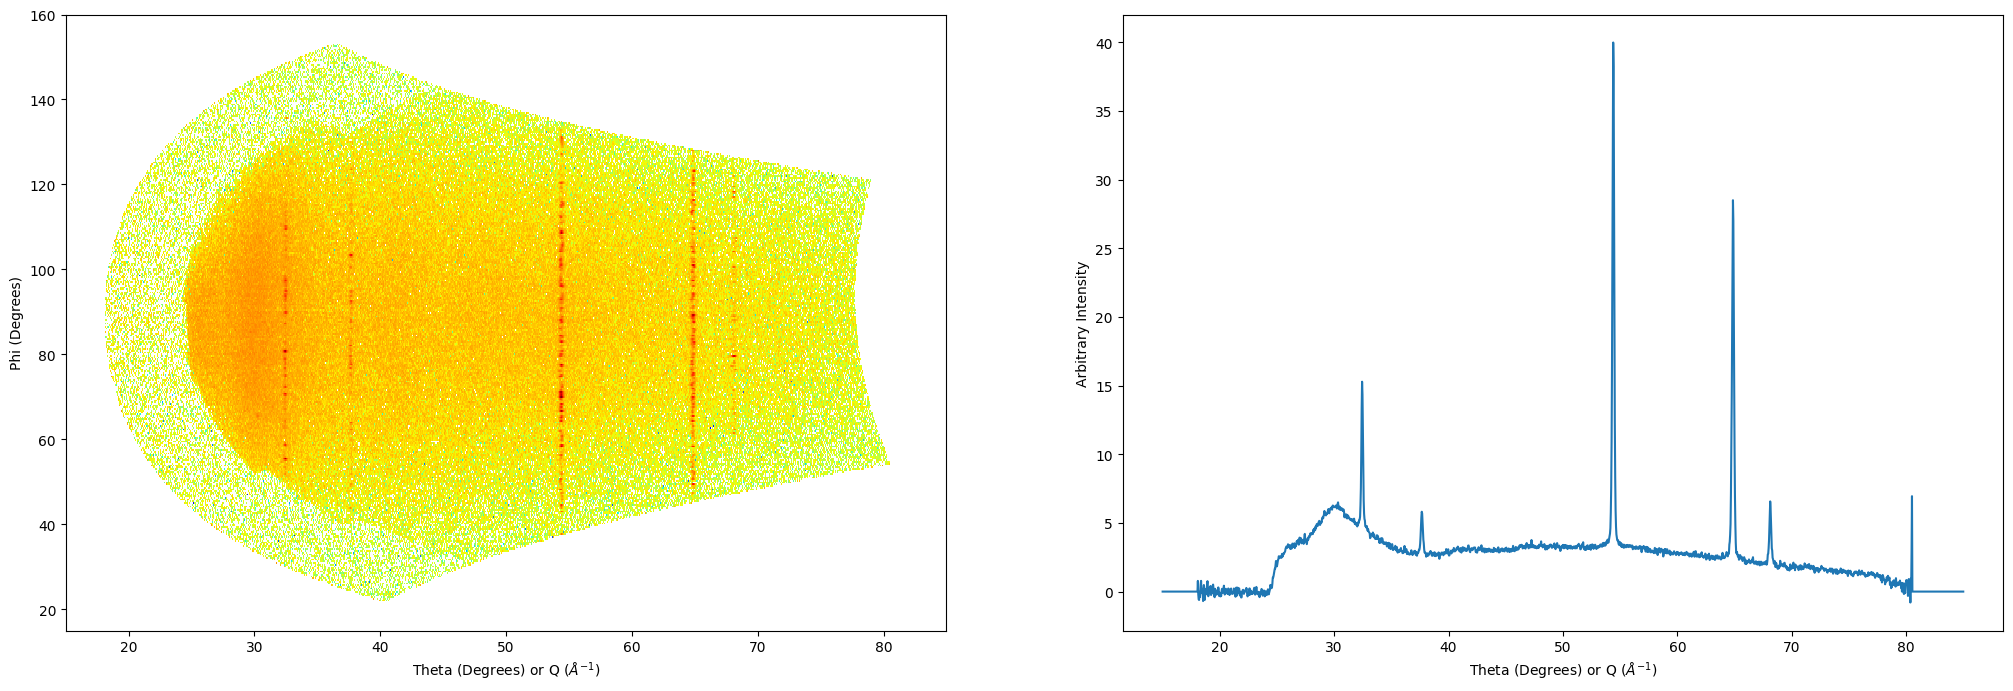

In [45]:
# pyFAI integration for VAREX 1
fpd1_CAKE = fpd1_PONI.integrate2d_ng(im_fpd1 * fpd1_map, npt_rad, npt_azim, azimuth_range=azim_range, radial_range=radial_range, correctSolidAngle=False, polarization_factor=None, unit=units, mask=fpd1_mask)
fpd1_INT = fpd1_PONI.integrate1d_ng(im_fpd1 * fpd1_map, npt_rad, azimuth_range=azim_range, radial_range=radial_range, correctSolidAngle=False, polarization_factor=None, unit=units, mask=fpd1_mask)

plot(fpd1_CAKE, fpd1_INT)